## Instacart Data Analysis

<p>Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition. Although the original dataset is no longer available on the Instacart website, we’ve created CSV files that contain a modified version of that data. The goal for this project is to clean up all the data and see the habits of instacart shoppers.<p>
    
### Data Used
    
- instacart_orders.csv: each row corresponds to one order on the Instacart app
        `order_id`: ID number that uniquely identifies each order
        `user_id`: ID number that uniquely identifies each customer account
        `order_number`: the number of times this customer has placed an order
        `order_dow`: day of the week that the order placed (which day is 0 is uncertain)
        `order_hour_of_day`: hour of the day that the order was placed
        `days_since_prior_order`: number of days since this customer placed their previous order

- products.csv: each row corresponds to a unique product that customers can buy
        `product_id`: ID number that uniquely identifies each product
        `product_name`: name of the product
        `aisle_id`: ID number that uniquely identifies each grocery aisle category
        `department_id`: ID number that uniquely identifies each grocery department category
    
- order_products.csv: each row corresponds to one item placed in an order
        `order_id`: ID number that uniquely identifies each order
        `product_id`: ID number that uniquely identifies each product
        `add_to_cart_order`: the sequential order in which each item was placed in the cart
        `reordered`: 0 if the customer has never ordered this product before, 1 if they have
    
- aisles.csv
        `aisle_id`: ID number that uniquely identifies each grocery aisle category
        `aisle`: name of the aisle
    
- departments.csv
        `department_id`: ID number that uniquely identifies each grocery department category
        `department`: name of the department
    


In [1]:
import pandas as pd
import numpy as np

orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [2]:
products = pd.read_csv('/datasets/products.csv', sep=';')

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [3]:
departments = pd.read_csv('/datasets/departments.csv', sep=';')

departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [4]:
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')

aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Loaded the necessary files for each dictionary to their respected variables. 

Run the command `inf0()` to see what argument I need to add to read the files correctly.


In [6]:
orders.head()





,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [7]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


#### Summary

<p>After loading the data and looking at the info() and head(), the data doesn't seem to be missing any values right now just looking at the 1st five rows of each data set. We will still need to check for duplicates and missing values in depth to be sure.<p>

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [11]:
# Check for duplicated orders
duplicated_orders = orders[orders.duplicated()]

duplicated_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [12]:
# Check for all orders placed Wednesday at 2:00 AM

# Convert 'order_dow' to numeric if it's not already
orders['order_dow'] = pd.to_numeric(orders['order_dow'], errors='coerce')

# Convert 'order_hour_of_day' to numeric if it's not already
orders['order_hour_of_day'] = pd.to_numeric(orders['order_hour_of_day'], errors='coerce')

# Filter for orders placed on Wednesday (day 3) at 2:00 AM (hour 2)
wednesday_2am_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

wednesday_2am_orders


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [13]:
# Remove duplicate orders

orders = orders.drop_duplicates()

orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [14]:
# Double check for duplicate rows

duplicate_rows = orders.duplicated()

# Count the number of duplicates
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [15]:
# Double check for duplicate order IDs only

duplicate_order_ids = orders.duplicated('order_id')
num_duplicates_order_ids = duplicate_order_ids.sum()
print("\nNumber of duplicates based on order_id:", num_duplicates_order_ids)


Number of duplicates based on order_id: 0


### Summary

<p> Checked the orders data frame set for any duplicates and removed them from the data set. Also checked on the number of duplicate rows and by order_id and it turn out theres 15 duplicates for each.<p>

### `products` data frame

In [16]:
# Check for fully duplicate rows

duplicate_rows = products.duplicated()

# Count the number of fully duplicated rows
num_duplicates = duplicate_rows.sum()
print("Number of fully duplicate rows:", num_duplicates)

Number of fully duplicate rows: 0


In [17]:
# Check for just duplicate product IDs

duplicate_product_ids = products.duplicated('product_id')

# Count the number of duplicate product IDs
num_duplicates = duplicate_product_ids.sum()
print("Number of duplicate product IDs:", num_duplicates)

Number of duplicate product IDs: 0


In [18]:
# Check for just duplicate product names (convert names to lowercase to compare better)

products['product_name_lower'] = products['product_name'].str.lower()

duplicate_product_names = products.duplicated('product_name_lower')

num_duplicates = duplicate_product_names.sum()
print("Number of duplicate product names:", num_duplicates)


Number of duplicate product names: 1361


In [19]:
# Check for duplicate product names that aren't missing

# Filter out rows where product names are missing
products_missing = products.dropna(subset=['product_name_lower'])

duplicate_product_names = products_missing.duplicated(subset=['product_name_lower'])

# Count the number of duplicate product names
num_duplicates = duplicate_product_names.sum()
print("Number of duplicate product names (non-missing values):", num_duplicates)


Number of duplicate product names (non-missing values): 104


### Summary

<p>For this data set, I checked to see if there are any duplicate rows, by their product_ids and product_names. It turn out there are no duplicate rows or by product_ids. There is however 1361 duplicate product names and 104 of the product names are non-missing value (NAN).<p>

### `departments` data frame

In [20]:
departments.duplicated().sum()


0

### Summary

<p> Checked for duplicates and missing value but there aren't any for this data set.<p>

### `aisles` data frame

In [21]:
aisles.duplicated().sum()

0

### Summary

<p> Checked for duplicates and missing value but there aren't any for this data set.<p>

### `order_products` data frame

In [22]:
# Check for fullly duplicate rows

fully_duplicates = order_products.duplicated()
num_fully_duplicates = fully_duplicates.sum()
print("Number of fully duplicated rows:", num_fully_duplicates)

Number of fully duplicated rows: 0


In [23]:
# Double check for any other tricky duplicates

# Double-check for tricky duplicates based on specific columns
tricky_duplicates = order_products.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order', 'reordered'])
num_tricky_duplicates = tricky_duplicates.sum()
print("\nNumber of tricky duplicates based on specific columns:", num_tricky_duplicates)


Number of tricky duplicates based on specific columns: 0


In [24]:
# Check for duplicates based on order_id and product_id combinations
order_product_duplicates = order_products.duplicated(subset=['order_id', 'product_id'])
num_order_product_duplicates = order_product_duplicates.sum()
print("Number of duplicates based on order_id and product_id:", num_order_product_duplicates)


Number of duplicates based on order_id and product_id: 0


### Summary

<p> Check for duplicates and found none in this data set. Also checked for the uniqueness of the combinations that should not be repeated such as `order_id` + `product_id`. <p>

## Find and remove missing values


### `products` data frame

In [25]:
missing_values = products.isnull().sum()

missing_values

product_id               0
product_name          1258
aisle_id                 0
department_id            0
product_name_lower    1258
dtype: int64

In [26]:
# Are all of the missing product names associated with aisle ID 100? 

# Filter rows with missing product names
missing_product_names = products[products['product_name'].isna()]

# Get unique aisle_id values among the rows with missing product names
unique_aisle_ids_for_missing = missing_product_names['aisle_id'].unique()

print("Unique aisle IDs for missing product names:", unique_aisle_ids_for_missing)

# Check if all missing product names are associated with a single aisle ID 100
all_missing_same_aisle = len(unique_aisle_ids_for_missing) == 1 and unique_aisle_ids_for_missing[0] == 100

print("All missing product names associated with aisle ID 100:", all_missing_same_aisle)

Unique aisle IDs for missing product names: [100]
All missing product names associated with aisle ID 100: True


In [27]:
# Are all of the missing product names associated with department ID 21? 

# Get unique department_id values among the rows with missing product names
unique_department_ids_for_missing = missing_product_names['department_id'].unique()

print("Unique department IDs for missing product names:", unique_department_ids_for_missing)

# Check if all missing product names are associated with a single department ID 21
all_missing_same_department = len(unique_department_ids_for_missing) == 1 and unique_department_ids_for_missing[0] == 21

print("All missing product names associated with department ID 21:", all_missing_same_department)

Unique department IDs for missing product names: [21]
All missing product names associated with department ID 21: True


In [28]:
# What is this ailse and department? missing

# Determine the names of the aisle and department
aisle_name = aisles[aisles['aisle_id'] == 100]['aisle'].values[0]
department_name = departments[departments['department_id'] == 21]['department'].values[0]

print("Aisle name for aisle ID 100:", aisle_name)
print("Department name for department ID 21:", department_name)

Aisle name for aisle ID 100: missing
Department name for department ID 21: missing


In [29]:
# Fill missing product names with 'Unknown'

products['product_name'] = products['product_name'].fillna('Unknown')

# Verify that there are no more missing product names
missing_values_after_fill = products.isnull().sum()
print("Missing values after filling product names:")
print(missing_values_after_fill)

Missing values after filling product names:
product_id               0
product_name             0
aisle_id                 0
department_id            0
product_name_lower    1258
dtype: int64


### Summary

<p> Look through the data set to see if there are any missing values. Found out that there are missing product names that are tied to aisle_id 100 and department_id 21. Turn out that aisle_id 21 and department_id 21 is named `missing` in the data set. I ended up filling in the missing value with `Unkown` so the data is complete.<p>

### `orders` data frame

Look at orders that are not the customer's first order and then check for any missing values in the `days_since_prior_order` column for these orders.

In [30]:
orders.isnull().sum()


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [31]:
# Are there any missing values where it's not a customer's first order?

missing_values_non_first_order = orders[(orders['order_number'] > 1) & (orders['days_since_prior_order'].isnull())]

print("Number of missing values in 'days_since_prior_order' where it's not the customer's first order:", len(missing_values_non_first_order))


Number of missing values in 'days_since_prior_order' where it's not the customer's first order: 0


### Summary

<p> There are no missing values in this data set and there is no missing values where it's not a customer's first order either.<p>

### `order_products` data frame

In [32]:
# Check if there is any missing values
missing_values = order_products.isnull().sum()

missing_values

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [33]:
# What are the min and max values in this column?

min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()

print(f"Minimum value in 'add_to_cart_order': {min_value}")
print(f"Maximum value in 'add_to_cart_order': {max_value}")

Minimum value in 'add_to_cart_order': 1.0
Maximum value in 'add_to_cart_order': 64.0


In [34]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

orders_with_missing_value = order_products[order_products['add_to_cart_order'].isnull()]['order_id'].unique()

print(f"Order IDs with missing values in 'add_to_cart_order': {orders_with_missing_value}")


Order IDs with missing values in 'add_to_cart_order': [2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [35]:
# Group by 'order_id' and count the number of products in each order
order_counts = order_products.groupby('order_id').size().reset_index(name='num_products')

# Filter the order_counts DataFrame to include only orders with missing values
orders_with_missing_counts = order_counts[order_counts['order_id'].isin(orders_with_missing_value)]

print(orders_with_missing_counts)

# Check if all orders with missing values have more than 64 products
all_orders_more_than_64_products = (orders_with_missing_counts['num_products'] > 64).all()
print("Do all orders with missing values have more than 64 products?", all_orders_more_than_64_products)

        order_id  num_products
1274        9310            65
8201       61355           127
13574     102236            95
17108     129627            69
21882     165801            70
...          ...           ...
394755   2999801            70
411168   3125735            86
435088   3308010           115
440301   3347453            71
445135   3383594            69

[70 rows x 2 columns]
Do all orders with missing values have more than 64 products? True


In [36]:
# Replace missing values with 999 and convert column to integer type

order_products['add_to_cart_order'].fillna(999, inplace=True)

# Convert the 'add_to_cart_order' column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

# Verify the changes
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


### Summary

<p> For this data set since the maximun items allowed in the add_to_cart_order is 64 there are some missing values associated with it. It turn out that all the missing value for the `add_to_cart_order` has a higher number than 64. In order to aggregate the date properly I filled in all the missing values with 999. <p>

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [37]:
# Check order_hour_of_day range
print("Range of order_hour_of_day:", orders['order_hour_of_day'].min(), "to", orders['order_hour_of_day'].max())

# Check order_dow range
print("Range of order_dow:", orders['order_dow'].min(), "to", orders['order_dow'].max())


Range of order_hour_of_day: 0 to 23
Range of order_dow: 0 to 6


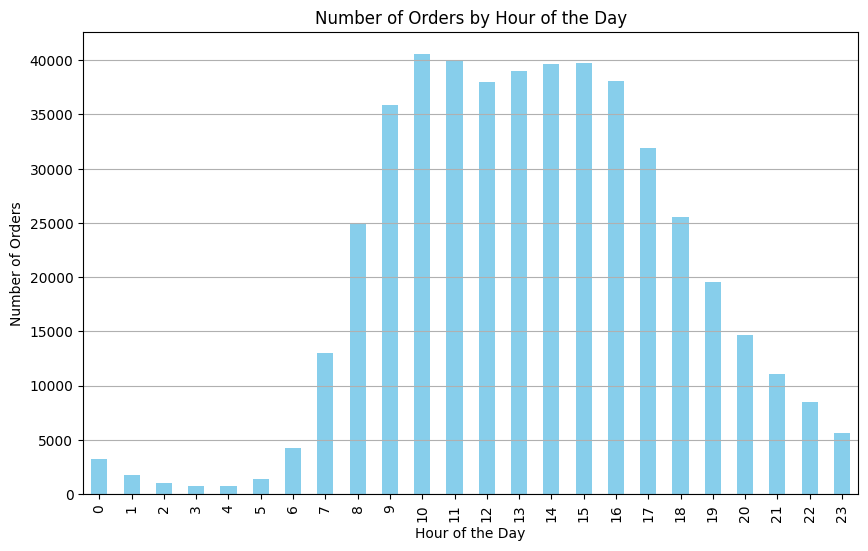

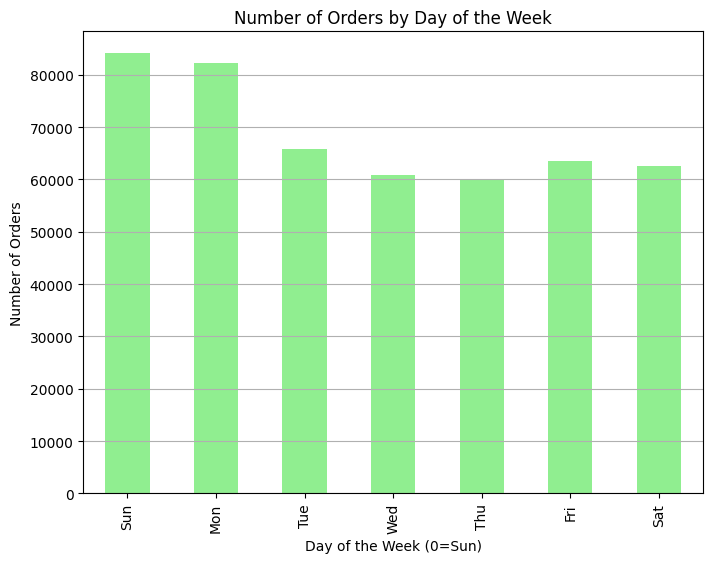

In [38]:
import matplotlib.pyplot as plt

# Create a DataFrame with orders per hour
orders_per_hour = orders['order_hour_of_day'].value_counts().sort_index()
df_orders_per_hour = pd.DataFrame({
    'hour': orders_per_hour.index,
    'num_orders': orders_per_hour.values
})

# Plot using the DataFrame orders per hour
df_orders_per_hour.plot(
    x='hour', 
    y='num_orders', 
    kind='bar', 
    color='skyblue', 
    title='Number of Orders by Hour of the Day',
    xlabel='Hour of the Day',
    ylabel='Number of Orders',
    figsize=(10, 6),
    legend=False
)

plt.xticks(range(24))
plt.grid(axis='y')
plt.show()

# Create a DataFrame with orders per day
orders_per_day = orders['order_dow'].value_counts().sort_index()
df_orders_per_day = pd.DataFrame({
    'day': orders_per_day.index,
    'num_orders': orders_per_day.values
})

# Plot using the DataFrame orders per day
df_orders_per_day.plot(
    x='day', 
    y='num_orders', 
    kind='bar', 
    color='lightgreen', 
    title='Number of Orders by Day of the Week',
    xlabel='Day of the Week (0=Sun)',
    ylabel='Number of Orders',
    figsize=(8, 6),
    legend=False
)

plt.xticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(axis='y')
plt.show()


### [A2] What time of day do people shop for groceries?

Based on the graph above, it looks like the most popular time to shop is 10am. The range from 10am to 3pm are the most active times people shop for groceries.

### [A3] What day of the week do people shop for groceries?

Sunday is the day most people do their groceries shopping follow by Monday.

### [A4] How long do people wait until placing another order?

Summary statistics for days_since_prior_order:
count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


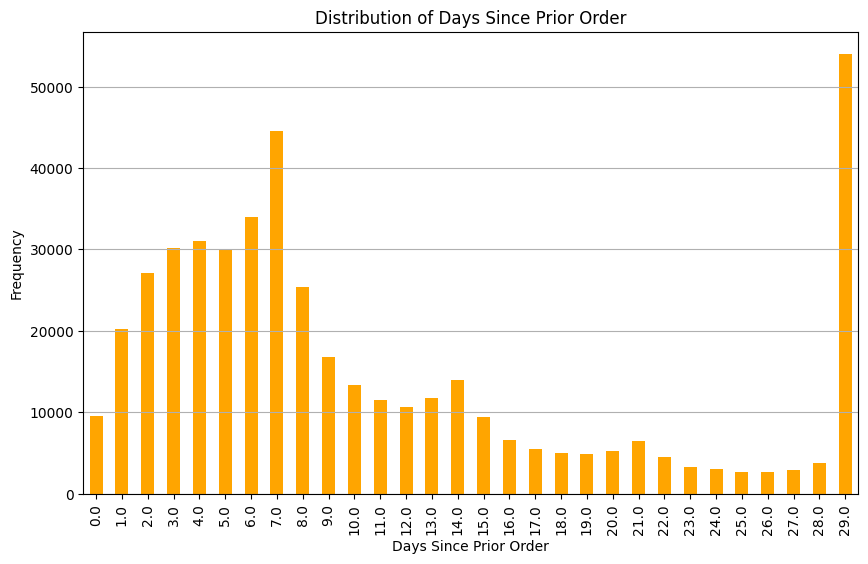

Minimum days since prior order: 0.0
Maximum days since prior order: 30.0


In [39]:
# Summary statistics for days_since_prior_order
days_since_prior_order_stats = orders['days_since_prior_order'].describe()
print("Summary statistics for days_since_prior_order:")
print(days_since_prior_order_stats)

# Create a DataFrame for the histogram data
days_data = orders['days_since_prior_order'].dropna()
hist_data, bin_edges = np.histogram(days_data, bins=30)

df_hist = pd.DataFrame({
    'days': bin_edges[:-1],
    'frequency': hist_data
})

# Plot using the DataFrame plot method
df_hist.plot(
    x='days', 
    y='frequency', 
    kind='bar', 
    color='orange', 
    title='Distribution of Days Since Prior Order',
    xlabel='Days Since Prior Order',
    ylabel='Frequency',
    figsize=(10, 6),
    legend=False
)

plt.grid(axis='y')
plt.show()

# Analyze minimum and maximum values
min_days = orders['days_since_prior_order'].min()
max_days = orders['days_since_prior_order'].max()
print("Minimum days since prior order:", min_days)
print("Maximum days since prior order:", max_days)

Based on the data it varies from 0 to 30 days wait before people place their orders. It seems like most people typically wait 7 days before placing their next order.

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

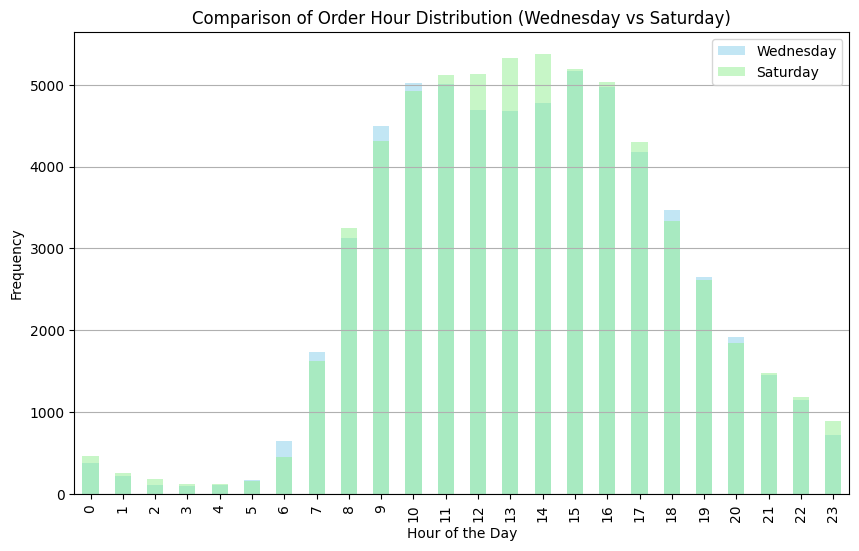

In [40]:
wednesday_orders = orders[orders['order_dow'] == 3]  # 3 corresponds to Wednesday
saturday_orders = orders[orders['order_dow'] == 6]   # 6 corresponds to Saturday

# Create DataFrames for histograms
wednesday_hist_data = wednesday_orders['order_hour_of_day'].value_counts().sort_index().reset_index()
wednesday_hist_data.columns = ['order_hour_of_day', 'frequency']

saturday_hist_data = saturday_orders['order_hour_of_day'].value_counts().sort_index().reset_index()
saturday_hist_data.columns = ['order_hour_of_day', 'frequency']

# Plot using the DataFrame created
fig, ax = plt.subplots(figsize=(10, 6))

wednesday_hist_data.plot(
    x='order_hour_of_day', 
    y='frequency', 
    kind='bar', 
    alpha=0.5, 
    label='Wednesday', 
    color='skyblue', 
    ax=ax
)

saturday_hist_data.plot(
    x='order_hour_of_day', 
    y='frequency', 
    kind='bar', 
    alpha=0.5, 
    label='Saturday', 
    color='lightgreen', 
    ax=ax
)

plt.title('Comparison of Order Hour Distribution (Wednesday vs Saturday)')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(range(24))
plt.legend()
plt.grid(axis='y')
plt.show()

### Observation

- For both Wednesdays and Saturdays, the highest number of orders is around 10 AM to 3 PM.
- The peak for Saturday orders seems to be more spread out throughout the day, whereas Wednesday orders show a sharper peak.
- There are more orders in the early morning hours (7 AM - 9 AM) on Wednesdays compared to Saturdays.
- The number of orders in the evening (5 PM - 7 PM) is slightly higher on Wednesdays than on Saturdays.
- The overall frequency of orders is higher on Saturdays than on Wednesdays, indicating that more people are placing orders on Saturdays.

### Analysis

These differences suggest that people tend to shop more throughout the day on Saturdays, likely due to having more free time on weekends. On Wednesdays, the ordering pattern might be influenced by work schedules, with more orders being placed early in the morning and in the evening.

### [B2] What's the distribution for the number of orders per customer?

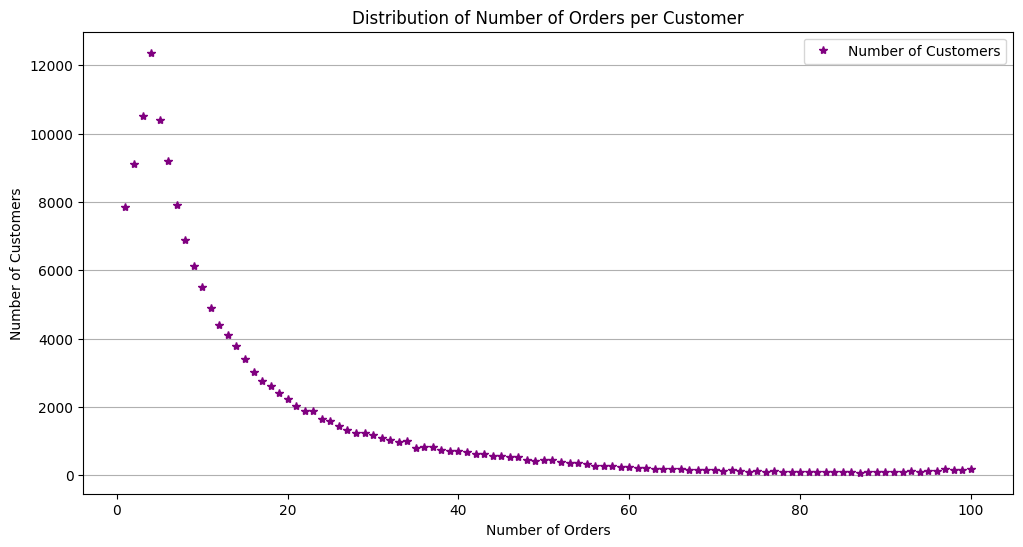

In [41]:

orders_per_user = orders.groupby('user_id')['order_number'].max().value_counts()
orders_per_user_df = orders_per_user.reset_index()
orders_per_user_df.columns = ['Number of Orders', 'Number of Customers']

# Plot using the specified dataframe
orders_per_user_df.plot(x='Number of Orders', 
                        y='Number of Customers', 
                        color='purple', 
                        title="Distribution of Number of Orders per Customer", 
                        style='*', 
                        xlabel="Number of Orders", 
                        ylabel="Number of Customers", 
                        figsize=[12, 6])

plt.grid(axis='y')
plt.show()

Most customers placed less than 10 orders.

### [B3] What are the top 20 popular products (display their id and name)?

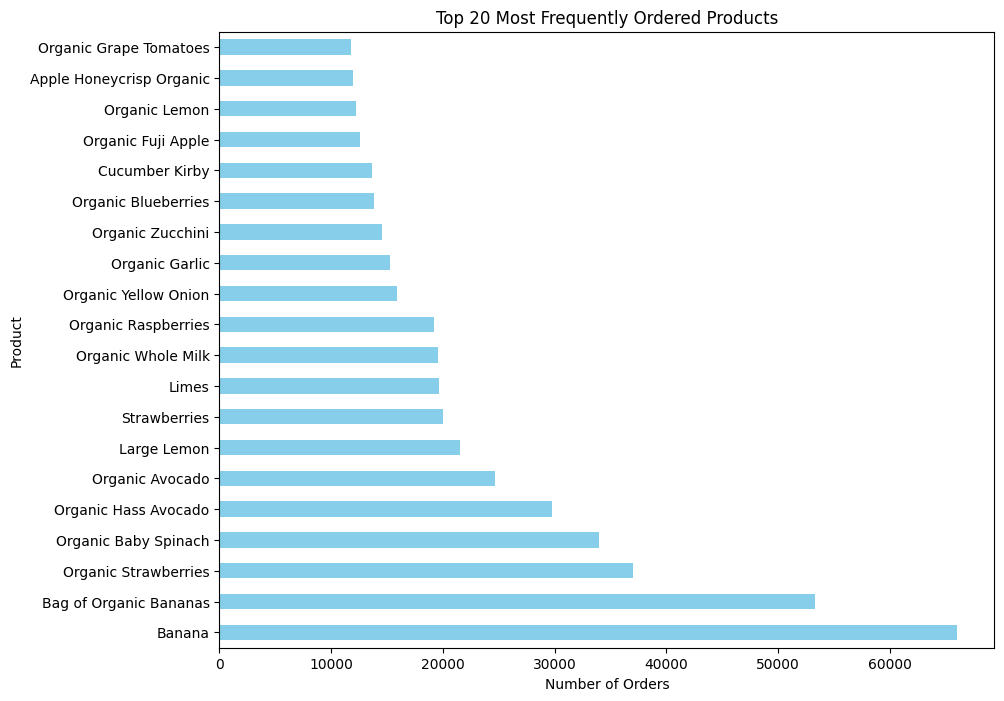

In [42]:
# Merge orders with order_products to get product names
merged_orders = pd.merge(order_products, products[['product_id', 'product_name']], on='product_id')

# Calculate frequency of each product
top_products = merged_orders['product_name'].value_counts().head(20)

# Plot top 20 products
plt.figure(figsize=(10, 8))
top_products.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 20 Most Frequently Ordered Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product')
plt.gca().invert_yaxis()
plt.show()



In [43]:
top_products_with_ids = merged_orders.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).head(20)
print("Top 20 Most Frequently Ordered Products:")
print(top_products_with_ids)


Top 20 Most Frequently Ordered Products:
product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dt

### [C1] How many items do people typically buy in one order? What does the distribution look like?

Average items per order: 10.097125627158112


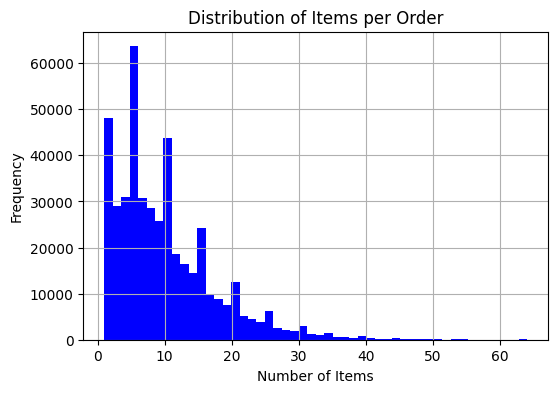

In [44]:
# Merge order_products with instacart_orders to get complete order details
merged_data = pd.merge(order_products, orders, on='order_id')

# Exclude rows where add_to_cart_order is 999
cleaned_data = merged_data[merged_data['add_to_cart_order'] != 999]

# Calculate number of items per order
items_per_order = cleaned_data.groupby('order_id')['add_to_cart_order'].count()

# Calculate average items per order
avg_items_per_order = items_per_order.mean()
print("Average items per order:", avg_items_per_order)

# Plot distribution of items per order
plt.figure(figsize=(6, 4))
items_per_order.hist(bins=50, color='blue')
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

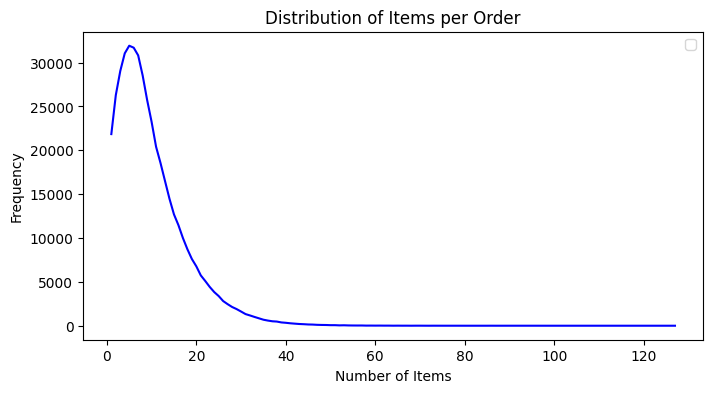

In [57]:
# ADDED BY REVIEWER
merged_data = pd.merge(order_products, orders, on='order_id')

items_per_order = merged_data.groupby('order_id')['add_to_cart_order'].count().reset_index()

items_per_order = items_per_order['add_to_cart_order'].value_counts().reset_index()


# Plot distribution of items per order
items_per_order.sort_values(by='index').plot(x='index', y='add_to_cart_order', color='blue', figsize=(8, 4))
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.legend('')
plt.show()

#### Average number of items per order: 10.097125627158112

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [ ]:
# Merge order_products with products to get product names
merged_data = pd.merge(order_products, products[['product_id', 'product_name']], on='product_id')

# Calculate the number of reorders for each product
reorder_counts = merged_data[merged_data['reordered'] == 1].groupby('product_id')['reordered'].count().reset_index()

# Merge with products dataframe to get product names
top_reorder_items = pd.merge(reorder_counts, products[['product_id', 'product_name']], on='product_id')

# Sort by the number of reorders in descending order and get the top 20 items
top_reorder_items = top_reorder_items.sort_values(by='reordered', ascending=False).head(20)

# Display top 20 items reordered most frequently
print("Top 20 Items Reordered Most Frequently:")
top_reorder_items[['product_id', 'product_name', 'reordered']]


#### It look likes Banana is the most reordered product.

### [C3] For each product, what proportion of its orders are reorders?

In [46]:
# Calculate reorder proportion for each product
product_reorder_proportion = merged_data.groupby('product_id')['reordered'].agg(['mean', 'count'])
product_reorder_proportion.reset_index(inplace=True)

# Merge with products dataframe to get product names
product_reorder_proportion = pd.merge(products[['product_id', 'product_name']], product_reorder_proportion, on='product_id')

# Rename columns for clarity
product_reorder_proportion.rename(columns={'mean': 'reorder_proportion', 'count': 'total_orders'}, inplace=True)

# Display table with product ID, product name, and reorder proportion
print("Proportion of Orders that are Reorders for Each Product:")
print(product_reorder_proportion[['product_id', 'product_name', 'reorder_proportion']])


Proportion of Orders that are Reorders for Each Product:
       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               7                     Pure Coconut Water With Orange   
...           ...                                                ...   
45568       49690                      HIGH PERFORMANCE ENERGY DRINK   
45569       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
45570       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
45571       49693                             SPRING WATER BODY WASH   
45572       49694                            BURRITO- STEAK & CHEESE   

       reorder_proportion  
0                0.564286  
1                0.000

In [ ]:
#ADDED BY REVIEWER

#Upload the dataframes. You can skip that step and use your own dataframes
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')

#Merge sales and products
reorder_pct = df_order_products.merge(df_products)

#Get the reorder ratio
reorder_pct = reorder_pct.groupby(['product_id', 'product_name'])['reordered'].mean().to_frame()

#Format the output
reorder_pct.head(20).style.format({'reordered': '{:.1%}'})

### [C5] What are the top 20 items that people put in their carts first? 

In [ ]:
# Group by product_id to find the number of times each product was the first item added to cart
first_in_cart_counts = merged_data[merged_data['add_to_cart_order'] == 1]['product_id'].value_counts().reset_index()
first_in_cart_counts.columns = ['product_id', 'first_in_cart_count']

# Merge with products dataframe to get product names
top_first_in_cart = pd.merge(products[['product_id', 'product_name']], first_in_cart_counts, on='product_id', how='right')

# Sort and display top 20 items that are first in cart
top_first_in_cart = top_first_in_cart.sort_values(by='first_in_cart_count', ascending=False).head(20)
print("Top 20 Items that are Most Frequently Added First to Cart:")
print(top_first_in_cart[['product_id', 'product_name', 'first_in_cart_count']])


## Conclusion

After cleaning up all the data sets and filling in the missing values needed before aggregating the data, the results are as follow:

 - There might be a techincal issues preventing customer from adding more than 64 items to their cart.
 - The range from 10am to 3pm are the most active times people shop for groceries.
 - People typically wait 7 days before placing their next order.
 - Most customers placed less than 10 orders.
 - Average items per order is around 10.
 - Banana is the most frequently ordered product with 66050 orders and also top of the reorder list with 55673 reordered.

    
